In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda --version



⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:27
🔁 Restarting kernel...
conda 23.11.0


In [1]:
#!conda install -c conda-forge ta-lib
import pandas as pd
import numpy as np
#import talib

**Creating of final_combined_df.csv which megres all datasets together**

Feature engineeering and preprocessing BTC

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('BTC-USD.csv')
df.columns = ['Date','Open','High','Low','Close','Adj Close','Volume']

#just to make sure sorted by date
df['Date'].str.strip()
df['Date']=pd.to_datetime(df['Date'])
df = df.sort_values('Date')
# Compute 14-day RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Compute MACD
df['macd'], df['macd_signal'], _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute Bollinger Bands
df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)
df['Close-Open']=df['Close']-df['Open']
df['High-Low']=df['High']-df['Low']
#remove all rows with NAN
df.dropna(inplace=True)
#reset index
df.reset_index(drop=True, inplace=True)
# Calculate OBV
df['OBV'] = np.where(df['Close'] > df['Close'].shift(1), df['Volume'], np.where(df['Close'] < df['Close'].shift(1), -df['Volume'], 0)).cumsum()
df['Close2-Close1']=df['Close'].shift(-1) - df['Close']

df['Close2']=df['Close'].shift(-1)
df.drop(df.index[0], inplace=True)

df['BB_height']=df['BB_upper']-df['BB_lower']


#normalize to ensure all same scale
# Normalize features
scaler = MinMaxScaler()
df['RSI_14'] = scaler.fit_transform(df[['RSI_14']])
df['macd'] = scaler.fit_transform(df[['macd']])
df['macd_signal'] = scaler.fit_transform(df[['macd_signal']])
df['BB_height'] = scaler.fit_transform(df[['BB_height']])
df['BB_upper'] = scaler.fit_transform(df[['BB_upper']])
df['BB_middle'] = scaler.fit_transform(df[['BB_middle']])
df['BB_lower'] = scaler.fit_transform(df[['BB_lower']])
df['Close-Open'] = scaler.fit_transform(df[['Close-Open']])
df['High-Low'] = scaler.fit_transform(df[['High-Low']])
df['OBV'] = scaler.fit_transform(df[['OBV']])
df['Open'] = scaler.fit_transform(df[['Open']])
df['High'] = scaler.fit_transform(df[['High']])
df['Low'] = scaler.fit_transform(df[['Low']])
df['Close'] = scaler.fit_transform(df[['Close']])
df['Adj Close'] = scaler.fit_transform(df[['Adj Close']])
df['Volume'] = scaler.fit_transform(df[['Volume']])

#create new column to track whether the Close price increased the next date
df['next_day_close_increased'] = (df['Close'].shift(-1) > df['Close']).astype(int)

df= df[:-1]
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,macd_signal,BB_upper,BB_middle,BB_lower,Close-Open,High-Low,OBV,Close2-Close1,Close2,BB_height,next_day_close_increased
1,2021-11-15,1.000000,1.000000,1.000000,1.000000,1.000000,0.221954,0.505447,0.774623,0.797197,0.969691,0.998199,0.991519,0.315056,0.243645,0.958919,-3396.625000,60161.246094,0.471009,0
2,2021-11-16,0.963809,0.948822,0.905487,0.928897,0.928897,0.365236,0.374911,0.701657,0.784968,0.965571,1.000000,1.000000,0.168286,0.423369,0.914817,206.765625,60368.011719,0.437136,1
3,2021-11-17,0.891802,0.890903,0.895040,0.933225,0.933225,0.297790,0.383383,0.646356,0.762735,0.965954,0.999727,0.998995,0.516551,0.204880,0.951702,-3425.875000,56942.136719,0.440838,0
4,2021-11-18,0.896235,0.893399,0.854067,0.861510,0.861510,0.317233,0.276859,0.550228,0.723307,0.976169,0.994055,0.975475,0.181335,0.395368,0.912736,1177.441406,58119.578125,0.531201,1
5,2021-11-19,0.826592,0.841481,0.836431,0.886158,0.886158,0.293602,0.326609,0.493283,0.678945,0.980360,0.990011,0.962276,0.608027,0.235669,0.949173,1577.617188,59697.195313,0.577358,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,2023-12-14,0.544884,0.542447,0.545746,0.570156,0.570156,0.178138,0.637231,0.909338,0.989033,0.557542,0.521928,0.483061,0.508398,0.142484,0.338377,-1094.214843,41929.757813,0.554204,0
761,2023-12-15,0.547779,0.536390,0.544200,0.547250,0.547250,0.125885,0.545660,0.882753,0.979207,0.558013,0.526363,0.491684,0.394569,0.121616,0.319887,310.359375,42240.117188,0.533530,1
762,2023-12-16,0.525854,0.527937,0.544829,0.553747,0.553747,0.079671,0.563771,0.863304,0.966967,0.557512,0.531472,0.502822,0.523352,0.080316,0.333432,-875.453125,41364.664063,0.503553,0
763,2023-12-17,0.531853,0.521831,0.535474,0.535421,0.535421,0.099836,0.494324,0.831616,0.950041,0.554056,0.535883,0.515929,0.415442,0.093364,0.317729,1258.875000,42623.539063,0.459805,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df.to_csv('/content/drive/My Drive/btc_only_df.csv', index=False)

Mounted at /content/drive


Preprocessing for sentiment (news )

In [ ]:
#News sentiment dataset
df_news = pd.read_csv('cryptonews.csv')
df_news.columns = ['date','sentiment','source','subject','text','title','url']
df_news.rename(columns={'date': 'Date'}, inplace=True)

df_news['Date']=df_news['Date'].str[:-8]
df_news['Date']=pd.to_datetime(df['Date'])


#handling the Sentiment column, splitting the column into sentiment polarity and sentiment subjectivity
# Convert the strings in the 'sentiment' column to dictionaries
df_news['sentiment'] = df_news['sentiment'].apply(eval)

# Split the 'sentiment' column into three separate columns
df_news[['sentiment_class', 'sentiment_polarity', 'sentiment_subjectivity']] = pd.DataFrame(df_news['sentiment'].tolist())
df_news.drop(columns=['sentiment'], inplace=True)
df_news.drop(columns=['sentiment_class'], inplace=True)
df_news=df_news.dropna()
df_news.head()

,Date,source,subject,text,title,url,sentiment_polarity,sentiment_subjectivity
1,2021-11-15,CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,0.00,0.00
2,2021-11-16,CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,0.05,0.05
3,2021-11-17,CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,0.50,0.90
4,2021-11-18,CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,0.00,0.00
5,2021-11-19,CryptoPotato,bitcoin,Yonsei found that during BTC’s rally in early ...,Is This Why Bitcoin’s Price Rally Was Halted? ...,https://cryptopotato.com/is-this-why-bitcoins-...,-0.01,0.38


In [ ]:


#aggregate over sentiment and subjectivity for same date and find mean

aggregated_news_sentiment_df = df_news.groupby('Date')[['sentiment_polarity','sentiment_subjectivity']].mean()
# Normalize features
scaler = MinMaxScaler()
aggregated_news_sentiment_df['sentiment_polarity'] = scaler.fit_transform(aggregated_news_sentiment_df[['sentiment_polarity']])
aggregated_news_sentiment_df['sentiment_subjectivity'] = scaler.fit_transform(aggregated_news_sentiment_df[['sentiment_subjectivity']])
aggregated_news_sentiment_df.head()

,sentiment_polarity,sentiment_subjectivity
Date,,
2021-11-15,0.411765,0.00
2021-11-16,0.441176,0.05
2021-11-17,0.705882,0.90
2021-11-18,0.411765,0.00
2021-11-19,0.405882,0.38


Preprocessing for sentiment (tweets)

In [ ]:
df_tweet = pd.read_csv('dataset_52-person-from-2021-02-05_2023-06-12_21-34-17-266_with_sentiment.csv')

#Standardise date format
df_tweet['created_at'] = pd.to_datetime(df_tweet.created_at)

#Rename date column
df_tweet = df_tweet.rename(columns={'created_at': 'Date'})
print(df_tweet['Date'].dtype)



df_tweet['scores'] = df_tweet['scores'].apply(eval)
#{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
# Split the 'sentiment' column into three separate columns
df_tweet[['neg', 'neu', 'pos','compound']] = pd.DataFrame(df_tweet['scores'].tolist())
df_tweet=df_tweet[['Date','neg', 'neu', 'pos','compound']]

aggregated_df_tweet = df_tweet.groupby('Date')[['neg', 'neu', 'pos','compound']].mean()

# Normalize features
scaler = MinMaxScaler()
aggregated_df_tweet ['neg'] = scaler.fit_transform(aggregated_df_tweet [['neg']])
aggregated_df_tweet ['neu'] = scaler.fit_transform(aggregated_df_tweet [['neu']])
aggregated_df_tweet ['pos'] = scaler.fit_transform(aggregated_df_tweet [['pos']])
aggregated_df_tweet ['compound'] = scaler.fit_transform(aggregated_df_tweet [['compound']])

aggregated_df_tweet.head()

datetime64[ns]


,neg,neu,pos,compound
Date,,,,
2021-02-01,0.046726,0.844039,0.135684,0.466404
2021-02-02,0.047619,0.706019,0.304843,0.603432
2021-02-03,0.030357,0.651331,0.392806,0.693650
2021-02-04,0.053869,0.795139,0.187678,0.490571
2021-02-05,0.027183,0.810957,0.199905,0.521028


Preprocessing for SnP index

In [ ]:
df_InterestRate = pd.read_csv('Interest Rate.csv')

df_InterestRate['Date'] = pd.to_datetime(df_InterestRate['Date'], format='%d/%m/%Y')
df_InterestRate['Date'] = df_InterestRate['Date'].dt.strftime('%Y-%m-%d')
df_InterestRate['Date'] = pd.to_datetime(df_InterestRate['Date'])
print(df_InterestRate['Date'].dtype)

# Normalize features
scaler = MinMaxScaler()
df_InterestRate['Interest Rate'] = scaler.fit_transform(df_InterestRate[['Interest Rate']])

df_InterestRate.head()

datetime64[ns]


,Date,Interest Rate
0,2021-10-12,0.001901
1,2021-10-13,0.001901
2,2021-10-14,0.001901
3,2021-10-15,0.001901
4,2021-10-16,0.001901


Merge datasets

In [ ]:
# inner join both tables based on date
merged_df = pd.merge(df, aggregated_news_sentiment_df, on='Date', how='inner')
merged_df.head()




,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,macd_signal,...,BB_lower,Close-Open,High-Low,OBV,Close2-Close1,Close2,BB_height,next_day_close_increased,sentiment_polarity,sentiment_subjectivity
0,2021-11-15,1.000000,1.000000,1.000000,1.000000,1.000000,0.221954,0.505447,0.774623,0.797197,...,0.991519,0.315056,0.243645,0.958919,-3396.625000,60161.246094,0.471009,0,0.411765,0.00
1,2021-11-16,0.963809,0.948822,0.905487,0.928897,0.928897,0.365236,0.374911,0.701657,0.784968,...,1.000000,0.168286,0.423369,0.914817,206.765625,60368.011719,0.437136,1,0.441176,0.05
2,2021-11-17,0.891802,0.890903,0.895040,0.933225,0.933225,0.297790,0.383383,0.646356,0.762735,...,0.998995,0.516551,0.204880,0.951702,-3425.875000,56942.136719,0.440838,0,0.705882,0.90
3,2021-11-18,0.896235,0.893399,0.854067,0.861510,0.861510,0.317233,0.276859,0.550228,0.723307,...,0.975475,0.181335,0.395368,0.912736,1177.441406,58119.578125,0.531201,1,0.411765,0.00
4,2021-11-19,0.826592,0.841481,0.836431,0.886158,0.886158,0.293602,0.326609,0.493283,0.678945,...,0.962276,0.608027,0.235669,0.949173,1577.617188,59697.195313,0.577358,1,0.405882,0.38


In [ ]:
merged_df2 = pd.merge(merged_df, aggregated_df_tweet, on='Date', how='inner')
merged_df2.head()


,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,macd_signal,...,Close2-Close1,Close2,BB_height,next_day_close_increased,sentiment_polarity,sentiment_subjectivity,neg,neu,pos,compound
0,2021-11-15,1.000000,1.000000,1.000000,1.000000,1.000000,0.221954,0.505447,0.774623,0.797197,...,-3396.625000,60161.246094,0.471009,0,0.411765,0.00,0.070476,0.611574,0.393732,0.557563
1,2021-11-16,0.963809,0.948822,0.905487,0.928897,0.928897,0.365236,0.374911,0.701657,0.784968,...,206.765625,60368.011719,0.437136,1,0.441176,0.05,0.141905,0.627315,0.288889,0.392398
2,2021-11-17,0.891802,0.890903,0.895040,0.933225,0.933225,0.297790,0.383383,0.646356,0.762735,...,-3425.875000,56942.136719,0.440838,0,0.705882,0.90,0.109286,0.745139,0.182906,0.421349
3,2021-11-18,0.896235,0.893399,0.854067,0.861510,0.861510,0.317233,0.276859,0.550228,0.723307,...,1177.441406,58119.578125,0.531201,1,0.411765,0.00,0.050595,0.718750,0.285613,0.574208
4,2021-11-19,0.826592,0.841481,0.836431,0.886158,0.886158,0.293602,0.326609,0.493283,0.678945,...,1577.617188,59697.195313,0.577358,1,0.405882,0.38,0.066667,0.874228,0.075024,0.335099


In [ ]:
merged_df3 = pd.merge(merged_df2, df_InterestRate, on='Date', how='inner')
merged_df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,macd_signal,...,Close2,BB_height,next_day_close_increased,sentiment_polarity,sentiment_subjectivity,neg,neu,pos,compound,Interest Rate
0,2021-11-15,1.000000,1.000000,1.000000,1.000000,1.000000,0.221954,0.505447,0.774623,0.797197,...,60161.246094,0.471009,0,0.411765,0.00,0.070476,0.611574,0.393732,0.557563,0.001901
1,2021-11-16,0.963809,0.948822,0.905487,0.928897,0.928897,0.365236,0.374911,0.701657,0.784968,...,60368.011719,0.437136,1,0.441176,0.05,0.141905,0.627315,0.288889,0.392398,0.001901
2,2021-11-17,0.891802,0.890903,0.895040,0.933225,0.933225,0.297790,0.383383,0.646356,0.762735,...,56942.136719,0.440838,0,0.705882,0.90,0.109286,0.745139,0.182906,0.421349,0.001901
3,2021-11-18,0.896235,0.893399,0.854067,0.861510,0.861510,0.317233,0.276859,0.550228,0.723307,...,58119.578125,0.531201,1,0.411765,0.00,0.050595,0.718750,0.285613,0.574208,0.001901
4,2021-11-19,0.826592,0.841481,0.836431,0.886158,0.886158,0.293602,0.326609,0.493283,0.678945,...,59697.195313,0.577358,1,0.405882,0.38,0.066667,0.874228,0.075024,0.335099,0.001901


In [ ]:
merged_df3=merged_df3.dropna()
len(merged_df3)

571

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#merged_df3.to_csv('/content/drive/My Drive/final_combined_df.csv', index=False)

**Add SnP data**

In [5]:
df_final = pd.read_csv('final_combined_df.csv')

In [9]:
from sklearn.preprocessing import MinMaxScaler

df_SP = pd.read_csv('SP500.csv')
df_SP['Date'] = pd.to_datetime(df_SP['Date'], format='%d/%m/%Y')
df_SP['Date'] = df_SP['Date'].dt.strftime('%Y-%m-%d')
df_SP.columns = ['Date','Open','High','Low','Close','Adj Close','Volume']

scaler = MinMaxScaler()
df_SP['Open'] = scaler.fit_transform(df_SP[['Open']])
df_SP['High'] = scaler.fit_transform(df_SP[['High']])
df_SP['Low'] = scaler.fit_transform(df_SP[['Low']])
df_SP['Close'] = scaler.fit_transform(df_SP[['Close']])
df_SP['Adj Close'] = scaler.fit_transform(df_SP[['Adj Close']])
df_SP['Volume'] = scaler.fit_transform(df_SP[['Volume']])

df_SP.rename(columns={'Open': 'SP_Open'}, inplace=True)
df_SP.rename(columns={'High': 'SP_High'}, inplace=True)
df_SP.rename(columns={'Low': 'SP_Low'}, inplace=True)
df_SP.rename(columns={'Close': 'SP_Close'}, inplace=True)
df_SP.rename(columns={'Adj Close': 'SP_AdjClose'}, inplace=True)
df_SP.rename(columns={'Volume': 'SP_Volume'}, inplace=True)


df_SP.head()

,Date,SP_Open,SP_High,SP_Low,SP_Close,SP_AdjClose,SP_Volume
0,2021-10-12,0.660317,0.633366,0.660098,0.634359,0.634359,0.248737
1,2021-10-13,0.652296,0.631697,0.650653,0.645142,0.645142,0.256724
2,2021-10-14,0.674677,0.686940,0.694760,0.706198,0.706198,0.253900
3,2021-10-15,0.722133,0.716760,0.742056,0.733348,0.733348,0.282559
4,2021-10-18,0.734616,0.727443,0.741886,0.745722,0.745722,0.262160


In [10]:
df_final=pd.merge(df_final, df_SP, on='Date', how='inner')
df_final.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,macd_signal,...,neu,pos,compound,Interest Rate,SP_Open,SP_High,SP_Low,SP_Close,SP_AdjClose,SP_Volume
0,2021-11-15,1.000000,1.000000,1.000000,1.000000,1.000000,0.221954,0.505447,0.774623,0.797197,...,0.611574,0.393732,0.557563,0.001901,0.910282,0.899858,0.916815,0.906718,0.906718,0.239658
1,2021-11-16,0.963809,0.948822,0.905487,0.928897,0.928897,0.365236,0.374911,0.701657,0.784968,...,0.627315,0.288889,0.392398,0.001901,0.902589,0.914342,0.921907,0.921560,0.921560,0.302425
2,2021-11-17,0.891802,0.890903,0.895040,0.933225,0.933225,0.297790,0.383383,0.646356,0.762735,...,0.745139,0.182906,0.421349,0.001901,0.919783,0.903229,0.925780,0.911531,0.911531,0.301962
3,2021-11-18,0.896235,0.893399,0.854067,0.861510,0.861510,0.317233,0.276859,0.550228,0.723307,...,0.718750,0.285613,0.574208,0.001901,0.919175,0.909261,0.916753,0.924545,0.924545,0.335319
4,2021-11-19,0.826592,0.841481,0.836431,0.886158,0.886158,0.293602,0.326609,0.493283,0.678945,...,0.874228,0.075024,0.335099,0.001901,0.925187,0.916656,0.933393,0.919149,0.919149,0.338789


In [11]:
df_final.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,macd_signal,...,neu,pos,compound,Interest Rate,SP_Open,SP_High,SP_Low,SP_Close,SP_AdjClose,SP_Volume
0,2021-11-15,1.000000,1.000000,1.000000,1.000000,1.000000,0.221954,0.505447,0.774623,0.797197,...,0.611574,0.393732,0.557563,0.001901,0.910282,0.899858,0.916815,0.906718,0.906718,0.239658
1,2021-11-16,0.963809,0.948822,0.905487,0.928897,0.928897,0.365236,0.374911,0.701657,0.784968,...,0.627315,0.288889,0.392398,0.001901,0.902589,0.914342,0.921907,0.921560,0.921560,0.302425
2,2021-11-17,0.891802,0.890903,0.895040,0.933225,0.933225,0.297790,0.383383,0.646356,0.762735,...,0.745139,0.182906,0.421349,0.001901,0.919783,0.903229,0.925780,0.911531,0.911531,0.301962
3,2021-11-18,0.896235,0.893399,0.854067,0.861510,0.861510,0.317233,0.276859,0.550228,0.723307,...,0.718750,0.285613,0.574208,0.001901,0.919175,0.909261,0.916753,0.924545,0.924545,0.335319
4,2021-11-19,0.826592,0.841481,0.836431,0.886158,0.886158,0.293602,0.326609,0.493283,0.678945,...,0.874228,0.075024,0.335099,0.001901,0.925187,0.916656,0.933393,0.919149,0.919149,0.338789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2023-06-06,0.200040,0.221089,0.205130,0.239719,0.239719,0.146035,0.443659,0.551274,0.566036,...,0.636240,0.292735,0.476686,0.952471,0.584804,0.561845,0.598785,0.579584,0.579584,0.305525
391,2023-06-07,0.230269,0.221456,0.219982,0.221030,0.221030,0.124923,0.356312,0.544159,0.564582,...,0.591858,0.354195,0.516141,0.952471,0.595807,0.570818,0.599460,0.566194,0.566194,0.375681
392,2023-06-08,0.212416,0.210769,0.222061,0.224425,0.224425,0.057835,0.374902,0.541567,0.562835,...,0.576374,0.348601,0.518285,0.952471,0.582740,0.569843,0.597217,0.587849,0.587849,0.283513
393,2023-06-09,0.215598,0.210225,0.223993,0.223843,0.223843,0.050012,0.372126,0.539656,0.561007,...,0.606121,0.333333,0.501629,0.952471,0.610922,0.590177,0.620989,0.591892,0.591892,0.278298


In [13]:
df_all=df_final.drop(columns=['pos','neu','neg','compound','Close2','Close2-Close1']) #exclude pos,neu,neg,compound as not present in backtest

**All features**

In [15]:
df_all

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,macd,macd_signal,...,next_day_close_increased,sentiment_polarity,sentiment_subjectivity,Interest Rate,SP_Open,SP_High,SP_Low,SP_Close,SP_AdjClose,SP_Volume
0,2021-11-15,1.000000,1.000000,1.000000,1.000000,1.000000,0.221954,0.505447,0.774623,0.797197,...,0,0.411765,0.00,0.001901,0.910282,0.899858,0.916815,0.906718,0.906718,0.239658
1,2021-11-16,0.963809,0.948822,0.905487,0.928897,0.928897,0.365236,0.374911,0.701657,0.784968,...,1,0.441176,0.05,0.001901,0.902589,0.914342,0.921907,0.921560,0.921560,0.302425
2,2021-11-17,0.891802,0.890903,0.895040,0.933225,0.933225,0.297790,0.383383,0.646356,0.762735,...,0,0.705882,0.90,0.001901,0.919783,0.903229,0.925780,0.911531,0.911531,0.301962
3,2021-11-18,0.896235,0.893399,0.854067,0.861510,0.861510,0.317233,0.276859,0.550228,0.723307,...,1,0.411765,0.00,0.001901,0.919175,0.909261,0.916753,0.924545,0.924545,0.335319
4,2021-11-19,0.826592,0.841481,0.836431,0.886158,0.886158,0.293602,0.326609,0.493283,0.678945,...,1,0.405882,0.38,0.001901,0.925187,0.916656,0.933393,0.919149,0.919149,0.338789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2023-06-06,0.200040,0.221089,0.205130,0.239719,0.239719,0.146035,0.443659,0.551274,0.566036,...,0,0.417647,0.68,0.952471,0.584804,0.561845,0.598785,0.579584,0.579584,0.305525
391,2023-06-07,0.230269,0.221456,0.219982,0.221030,0.221030,0.124923,0.356312,0.544159,0.564582,...,1,0.647059,0.50,0.952471,0.595807,0.570818,0.599460,0.566194,0.566194,0.375681
392,2023-06-08,0.212416,0.210769,0.222061,0.224425,0.224425,0.057835,0.374902,0.541567,0.562835,...,0,0.435294,0.30,0.952471,0.582740,0.569843,0.597217,0.587849,0.587849,0.283513
393,2023-06-09,0.215598,0.210225,0.223993,0.223843,0.223843,0.050012,0.372126,0.539656,0.561007,...,0,0.411765,0.00,0.952471,0.610922,0.590177,0.620989,0.591892,0.591892,0.278298


In [14]:
df_all.to_csv('final_combined_df.csv', index=False)

**Visualization: Coefficient Matrix**

Kendall coeeficient matrix (assumes non-linear) for categorial ordinal output

Pearson correlation matrix (assumes linear relationship) for continuous output

hence we used kendall

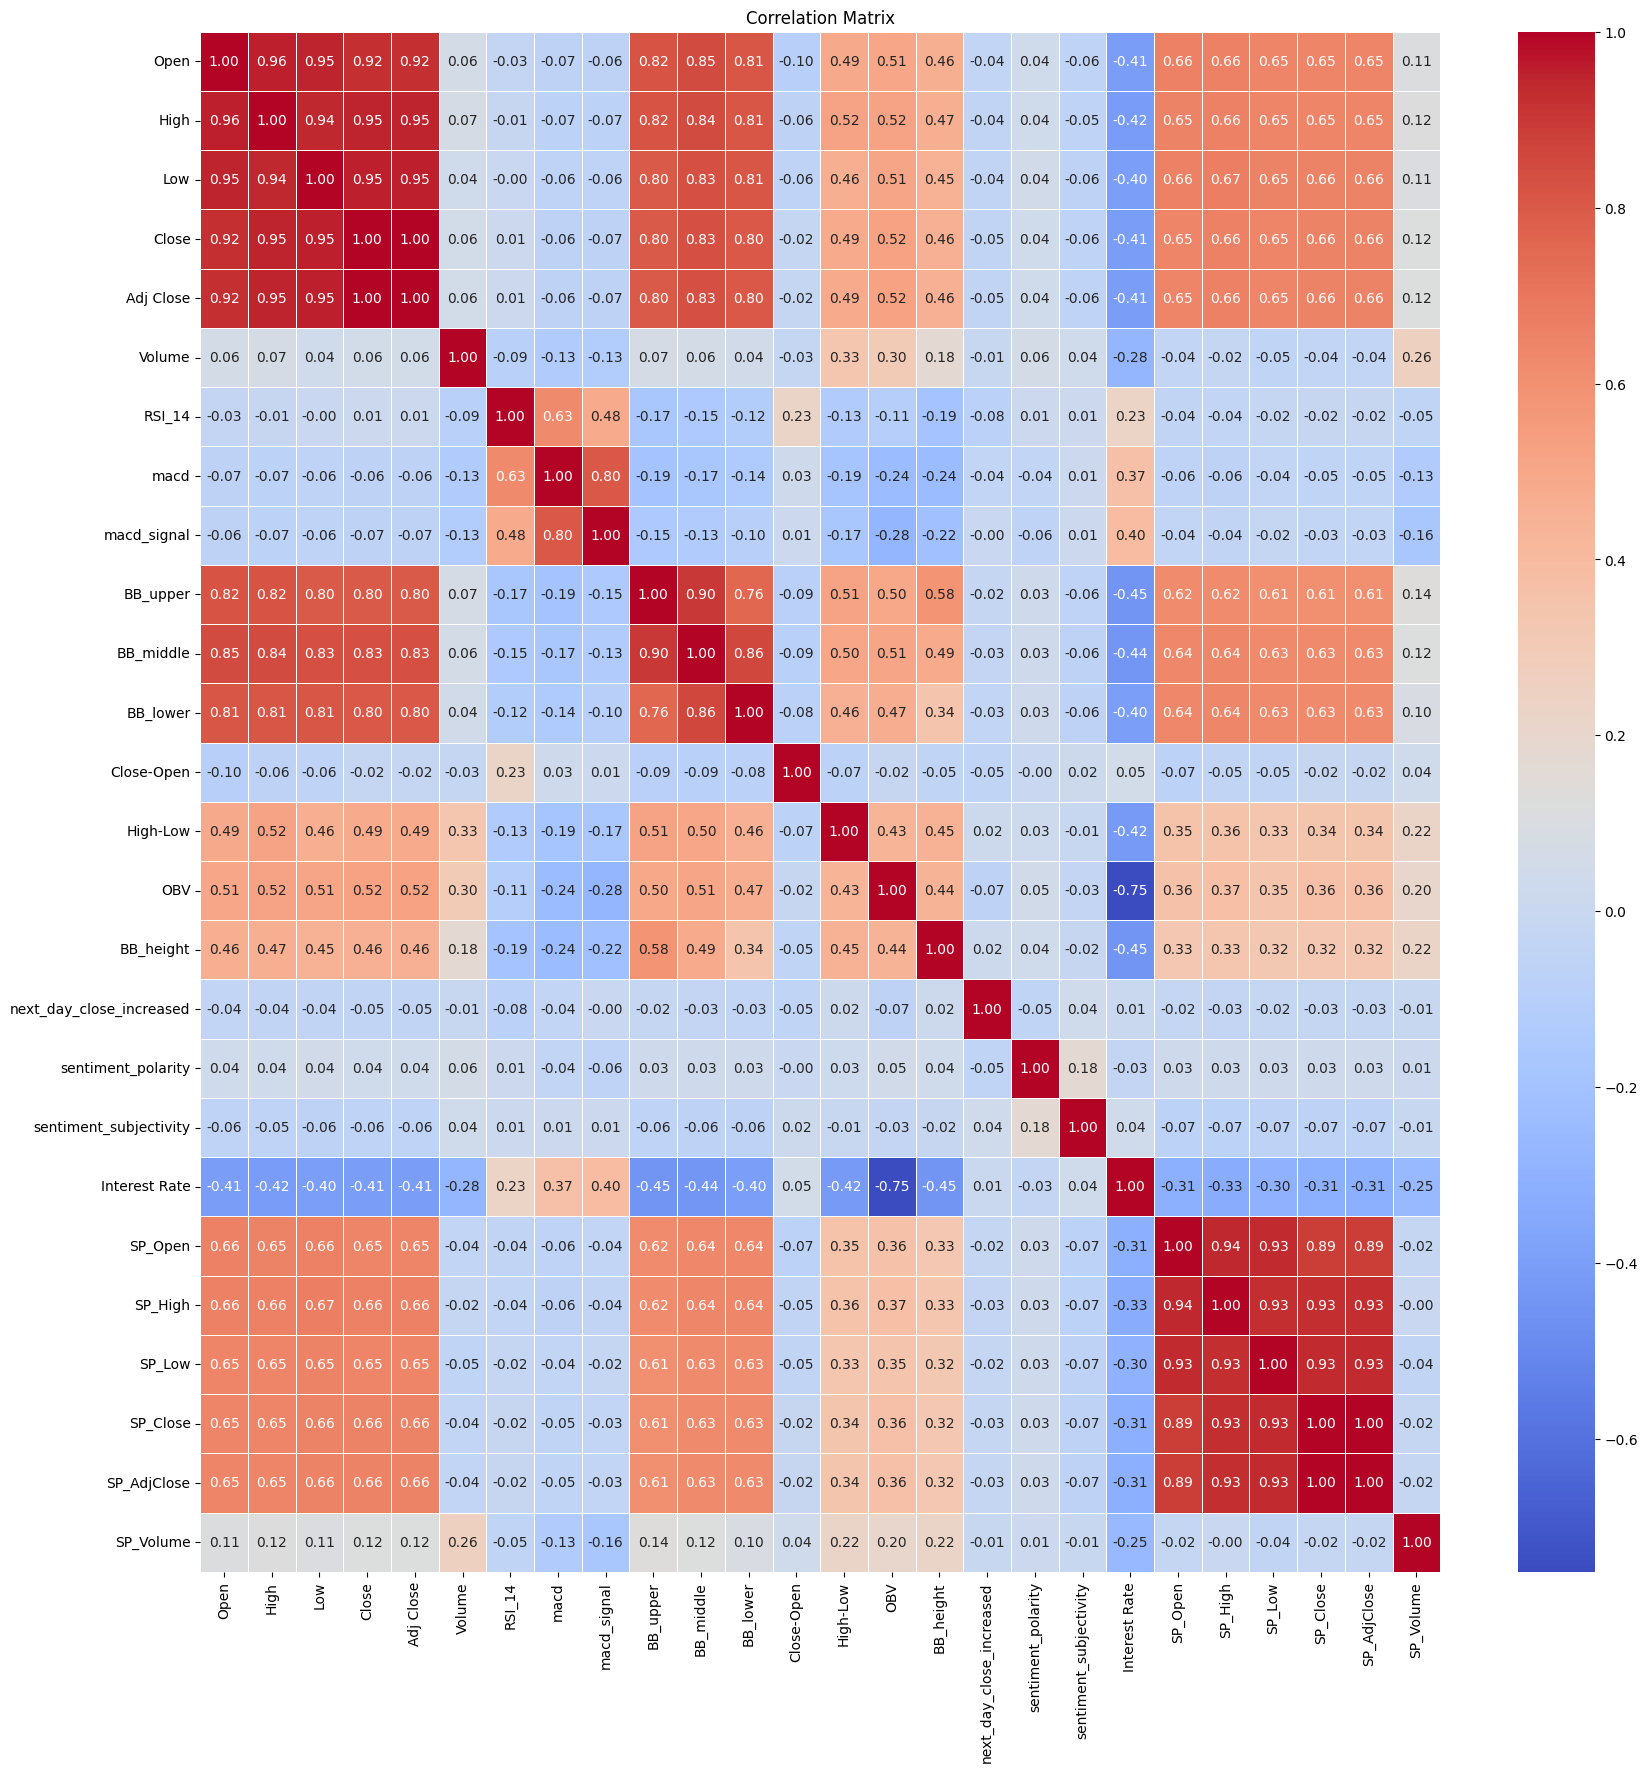

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

test=df_all.drop(columns=['Date'])
correlation_matrix = test.corr(method='kendall')

# Plotting
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()